<a href="https://colab.research.google.com/github/kevin6449/LANGCHAIN_RAG/blob/main/ai_gemini_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
At the command line, only need to run once to install the package via pip:

$ pip install google-generativeai
"""

import google.generativeai as genai

In [2]:
from google.colab import userdata

API_KEY=userdata.get('GOOGLE_API_KEY')

In [3]:
#genai.configure(api_key="YOUR_API_KEY")

# Configure the client library by providing your API key.
genai.configure(api_key=API_KEY)

In [4]:
# Set up the model
generation_config = {
  "temperature": 0.9,
  "top_p": 1,
  "top_k": 1,
  "max_output_tokens": 2048,
}

    Safety Settings

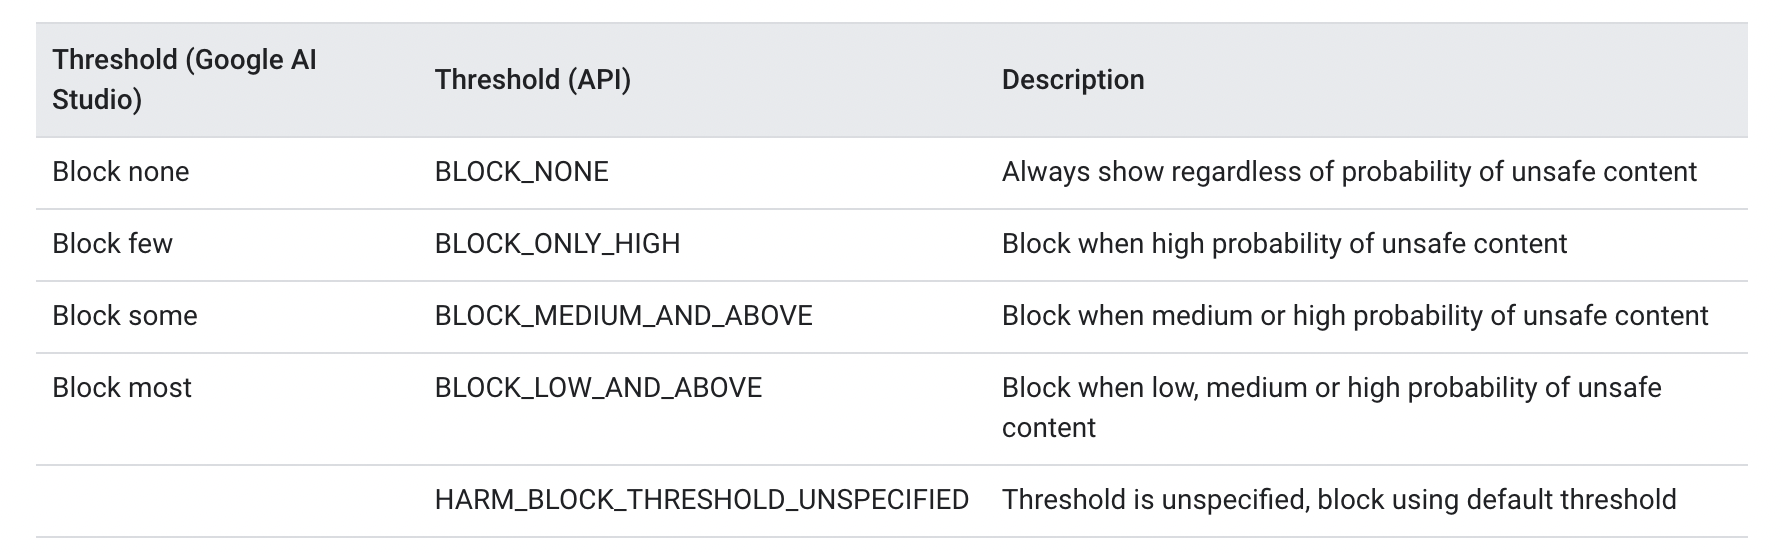

In [5]:
safety_settings = [
  {
    "category": "HARM_CATEGORY_HARASSMENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_HATE_SPEECH",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
]


In [11]:
model = genai.GenerativeModel(model_name="gemini-1.5-flash",
                              generation_config=generation_config,
                              safety_settings=safety_settings)



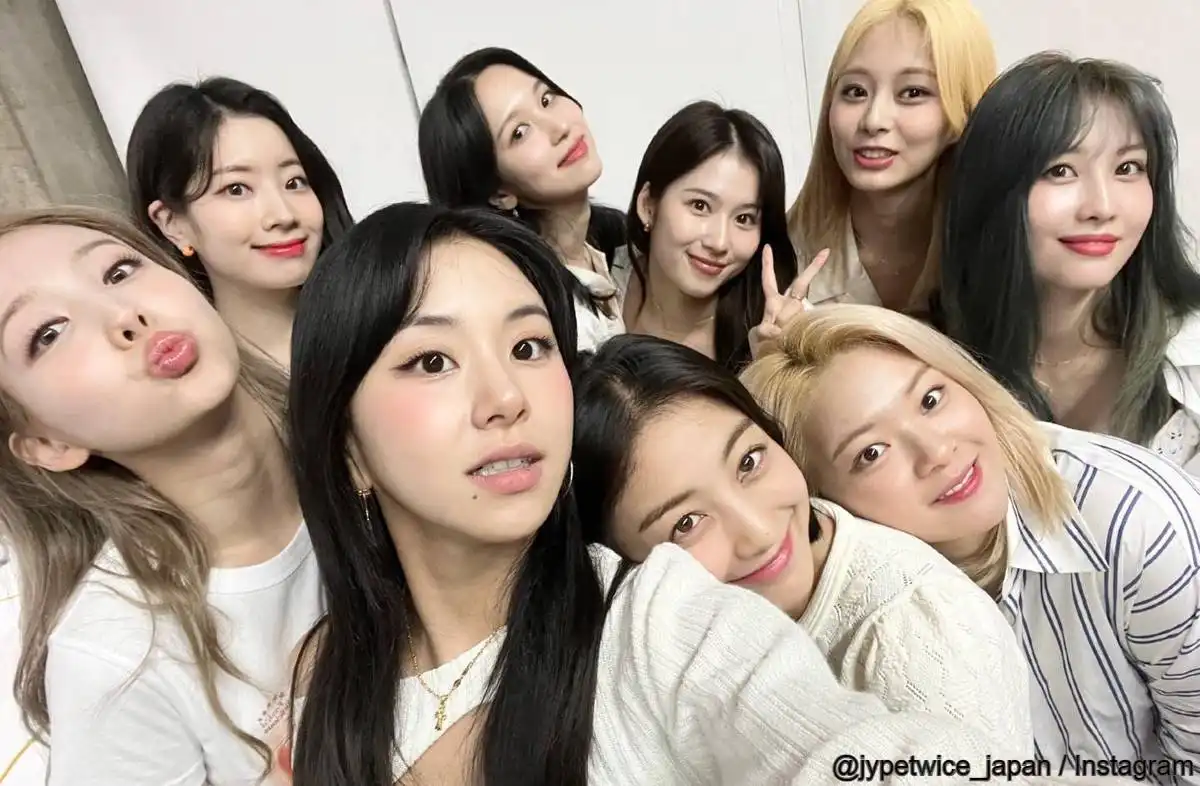

In [12]:
import urllib.request
from PIL import Image

# from PIL import Image
image_url = "https://www.kpopmonster.jp/wp-content/uploads/2022/11/twice01-2.jpg.webp"

# Download the image using urllib
urllib.request.urlretrieve(image_url, "girls.png")
# Open the downloaded image in PIL
my_img = Image.open("girls.png")
# Show the image
my_img

In [13]:
from pathlib import Path

if not (img := Path("girls.png")).exists():
  raise FileNotFoundError(f"Could not find image: {img}")

image_parts = [
  {
    "mime_type": "image/png",
    "data": Path("girls.png").read_bytes()
  },
]

In [14]:
prompt_parts = [
  "如果給你一張圖，請你辨識出上面的人名嗎\n",
  image_parts[0],
  "\n",
]


In [15]:
response = model.generate_content(prompt_parts)
print(response.text)

#娜璉、多賢、彩瑛、Mina、志效、Sana、定延、子瑜、Momo

這張圖裡的成員是韓國女團 TWICE，由左至右分別是：

* 娜璉 (Nayeon)
* 多賢 (Dahyun)
* 貞yeon (Jeongyeon)
* Momo
* Sana
* Mina
* 志效 (Jihyo)
* 彩瑛 (Chaeyoung)
* 子瑜 (Tzuyu) 

